# Experiment 1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sympy as s
from sympy import Symbol
from sympy import integrate

In [4]:
def Bx_hat(X, i):
    N = np.shape(X)[0]
    EX = np.mean(X)
    abs_i = abs(i)
    val = 0
    for n in range(0, N-abs(i)):
        val += (X[n+abs_i]-EX)*(X[n]-EX)
    val /= N
    return val

In [3]:
np.random.seed(10)
X = np.random.rand(2000)
print(X[0:50])

[ 0.77132064  0.02075195  0.63364823  0.74880388  0.49850701  0.22479665
  0.19806286  0.76053071  0.16911084  0.08833981  0.68535982  0.95339335
  0.00394827  0.51219226  0.81262096  0.61252607  0.72175532  0.29187607
  0.91777412  0.71457578  0.54254437  0.14217005  0.37334076  0.67413362
  0.44183317  0.43401399  0.61776698  0.51313824  0.65039718  0.60103895
  0.8052232   0.52164715  0.90864888  0.31923609  0.09045935  0.30070006
  0.11398436  0.82868133  0.04689632  0.62628715  0.54758616  0.819287
  0.19894754  0.8568503   0.35165264  0.75464769  0.29596171  0.88393648
  0.32551164  0.1650159 ]


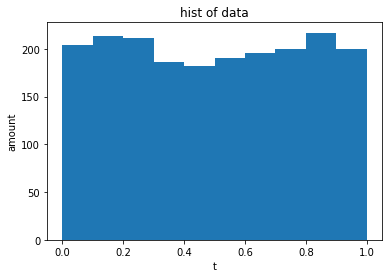

In [4]:
plt.figure()
amounts, _, _ = plt.hist(X)
plt.title('hist of data')
plt.ylabel('amount')
plt.xlabel('t')
plt.show()

In [5]:
data = np.zeros((3,10))
data[0,:] = 200
data[1,:] = amounts
data[2,:] = np.absolute(amounts-data[0,:])/data[0,:]
df = pd.DataFrame(data)
df.index = ['theoretical value', 'practical value', 'error']
df.columns = df.columns + 1
df

,1,2,3,4,5,6,7,8,9,10
theoretical value,200.00,200.00,200.000,200.00,200.00,200.00,200.00,200.0,200.000,200.0
practical value,204.00,214.00,211.000,186.00,182.00,190.00,196.00,200.0,217.000,200.0
error,0.02,0.07,0.055,0.07,0.09,0.05,0.02,0.0,0.085,0.0


In [6]:
print('theoretical mean: ', 0.5)
print('practical mean: ', np.mean(X))

theoretical mean:  0.5
practical mean:  0.498595175369


In [7]:
print('theoretical variance: ', 1/12)
print('practical variance: ', np.var(X))

theoretical variance:  0.08333333333333333
practical variance:  0.0856778615785


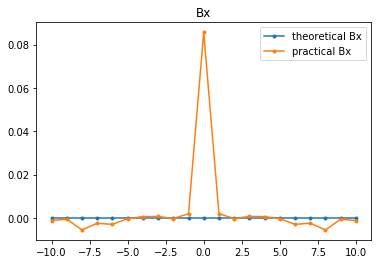

In [8]:
Bx_h = np.zeros((21, 1))
x = np.arange(-10, 10+1, 1)
for i, v in enumerate(x):
    Bx_h[i] = Bx_hat(X, v)

plt.plot(x, np.zeros_like(x), '.-')
plt.plot(x, Bx_h, '.-')
plt.legend(['theoretical Bx', 'practical Bx'])
plt.title('Bx')
plt.show()

In [9]:
pd.set_option('display.max_columns',100)
pd.set_option('display.precision',5)
data = np.zeros((2,np.shape(x)[0]))
data[0,:] = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
data[1,:] = np.squeeze(Bx_h)
df = pd.DataFrame(data)
df.index = ['theoretical Bx', 'practical Bx']
df.columns = x
df

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10
theoretical Bx,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
practical Bx,-0.00122,-0.00059,-0.00554,-0.00247,-0.00298,-0.00035,0.0006,0.00068,-0.00029,0.00194,0.08568,0.00194,-0.00029,0.00068,0.0006,-0.00035,-0.00298,-0.00247,-0.00554,-0.00059,-0.00122


# Experiment 2

In [10]:
np.random.seed(55)
X = np.random.rand(25000)
# Y = np.random.randn(2000)
Y = np.zeros(2000)
for i in range(0,2000):
    Y[i] = np.sum(X[12*i:12*i+12]-0.5)
print(Y[0:50])

[-0.78580149  0.91558336  0.26679742  1.03427115  0.01360813 -1.43302117
  0.02838285  0.93930686 -0.27297461  0.71313708 -0.67394771 -1.18851013
 -1.03358154 -0.97556141 -0.05937913 -1.0852331   0.61210618 -0.49002067
 -1.15550763  0.31011511  0.10845409  0.83946053 -0.14980455 -0.56878991
  0.94269235  0.1884211   0.34181886 -1.59142244  1.04672648 -0.11098559
 -1.61946593  0.3348359   1.38315576 -0.36999028 -0.33928221  0.01447092
 -1.02190267 -0.24710888 -2.32144219 -0.401806    1.70194589  0.49332755
  0.1851737  -0.8163923   0.07346427  1.42283872  1.07912717  0.62912514
  1.23192427 -0.6240719 ]


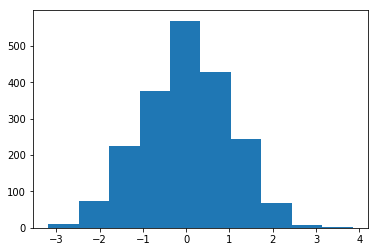

In [11]:
plt.figure()
amounts, _, _ = plt.hist(Y)
plt.show()

In [12]:
def gauss(x, mu1, sigma1):
    return 1/(s.sqrt(2*s.pi)*sigma1)*s.exp(-(x-mu1)**2/(2*sigma1**2))

In [13]:
x = Symbol('x')
y = gauss(x, 0, 1)
lis_ther = []
for i in ([-s.oo, -3], [-3, -2], [-2, -1], [-1, 0], [0, 1], [1, 2], \
          [2, 3], [3, s.oo]):
    lis_ther.append(int(integrate(y, (x, i[0],i[1])).evalf()*2000))
lis_pret = []
lis_pret.append(np.sum(Y<-3))
for i in ([-3, -2], [-2, -1], [-1, 0], [0, 1], [1, 2], [2, 3]):
    lis_pret.append(np.sum((Y>i[0])&(Y<i[1])))
lis_pret.append(np.sum(Y>3))

# pd.set_option('display.max_colwidth',100)
arr_ther = np.array(lis_ther)
arr_pret = np.array(lis_pret)
data = np.zeros((3,arr_ther.shape[0]))
data[0,:] = arr_ther
data[1,:] = arr_pret
data[2,:] = np.abs(arr_pret-arr_ther)/arr_ther * 100
df = pd.DataFrame(data)
df.index = ['theoretical amounts', 'practical amounts', 'error(%)']
df.columns = ['(-oo,-3]','(-3,-2]','(-2,-1]','(-1,0]','(0,1]','(1,2]',\
              '(2,3]','(3,oo)']
df

,"(-oo,-3]","(-3,-2]","(-2,-1]","(-1,0]","(0,1]","(1,2]","(2,3]","(3,oo)"
theoretical amounts,2.0,42.00000,271.00000,682.00000,682.00000,271.00000,42.00000,2.0
practical amounts,2.0,45.00000,284.00000,668.00000,667.00000,287.00000,45.00000,2.0
error(%),0.0,7.14286,4.79705,2.05279,2.19941,5.90406,7.14286,0.0


In [14]:
data = np.zeros((2,10))
data[0,:] = 200
data[1,:] = amounts
df = pd.DataFrame(data)
df.index = ['theoretical value', 'practical value']
df.columns = df.columns + 1
df

,1,2,3,4,5,6,7,8,9,10
theoretical value,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
practical value,10.0,73.0,225.0,375.0,569.0,428.0,243.0,67.0,9.0,1.0


In [15]:
print('theoretical mean value: ', 0.0)
print('practical mean value: ', np.mean(Y))

theoretical mean value:  0.0
practical mean value:  0.00705865846988


In [16]:
print('theoretical variance: ', 1)
print('practical variance: ', np.var(Y))

theoretical variance:  1
practical variance:  1.01861058877


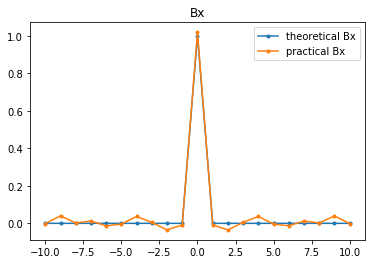

In [17]:
Bx_h = np.zeros((21, 1))
x = np.arange(-10, 10+1, 1)
for i, v in enumerate(x):
    Bx_h[i] = Bx_hat(Y, v)
plt.figure()
plt.plot(x, [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0], '.-')
plt.plot(x, Bx_h, '.-')
plt.legend(['theoretical Bx', 'practical Bx'])
plt.title('Bx')
plt.show()

# Experiment 3

In [18]:
cosi = np.random.randn(2000)
X = np.zeros(1000)
for i in range(1000):
    X[i] = cosi[i+1] + 4*cosi[i]

In [19]:
print('X theoretical mean:', 0.0)
print('X practical mean: ', np.mean(X))

X theoretical mean: 0.0
X practical mean:  0.038527382835


In [20]:
print('X^2 theoretical mean: ', 17)
print('X^2 practical mean: ', np.mean(X**2))

X^2 theoretical mean:  17
X^2 practical mean:  17.1254809939


In [21]:
print('X theoretical variance: ', 17)
print('X practical variance: ', np.mean(X**2)-np.mean(X)**2)

X theoretical variance:  17
X practical variance:  17.1239966347


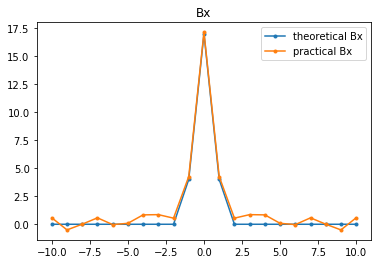

In [22]:
Bx_h = np.zeros((21, 1))
x = np.arange(-10, 10+1, 1)
for i, v in enumerate(x):
    Bx_h[i] = Bx_hat(X, v)

plt.figure()
plt.plot(x, [0,0,0,0,0,0,0,0,0,4,17,4,0,0,0,0,0,0,0,0,0], '.-')
plt.plot(x, Bx_h, '.-')
plt.legend(['theoretical Bx', 'practical Bx'])
plt.title('Bx')
plt.show()

# Expriment 4

In [23]:
cosi = np.random.randn(2000)
k = 10
X = np.zeros(k)
X[0] = np.random.randn()
for i in range(1, k):
    X[i] = cosi[i] - 0.707*X[i-1]

In [24]:
print('X theoretical mean: ', np.power(-0.707, k)*X[0])
print('X practical mean: ', np.mean(X))

X theoretical mean:  -0.000248772231688
X practical mean:  -0.0943930641225


In [25]:
print('X theoretical variance: ', np.power(-0.707, k)*X[0])
print('X practical variance ', np.var(X))

X theoretical variance:  -0.000248772231688
X practical variance  2.57313200231


In [26]:
def f_gamma_x(X, m, a):
    X_0 = X[0]
    N = np.shape(X)[0]
    EX = np.mean(X)
    abs_m = abs(m)
    val = 0
    for k in range(1, N-abs_m+1):
        s = k + abs_m
        val += np.power((-a),k+s)*X_0**2+(np.power(-a,np.abs(k-s))-\
                                          np.power(-a,np.abs(k+s)))/(1-a**2)
    val /= N
    return val

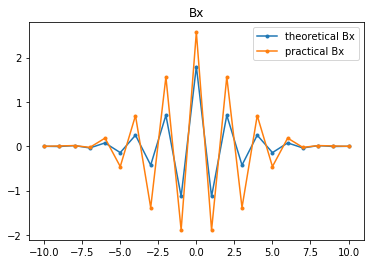

In [27]:
Bx_h = np.zeros((21, 1))
Bx_ex = np.zeros((21, 1))
x = np.arange(-10, 10+1, 1)

for i, v in enumerate(x):
    Bx_ex[i] = f_gamma_x(X, v, 0.707)

for i, v in enumerate(x):
    Bx_h[i] = Bx_hat(X, v)

plt.figure()
plt.plot(x, Bx_ex, '.-')
plt.plot(x, Bx_h, '.-')
plt.legend(['theoretical Bx', 'practical Bx'])
plt.title('Bx')
plt.show()

# Experiment 5

In [28]:
def func(n):
    X = np.arange(-n, n+1, 1)
    X = np.sin(X*np.pi/2)
    return X

In [29]:
def X_t(t):
    val = np.sin(t)
    return val
def Y_t(t, N):
    val = 0
    for n in range(-N, N+1):
        val += X_t(n*np.pi/2) * np.sin(t-n*np.pi/2) / (t-n*np.pi/2)
    return val

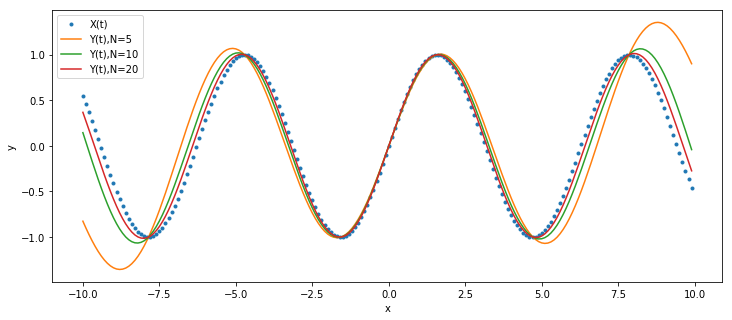

In [30]:
x = np.arange(-10,10,0.1)
x_t = X_t(x)
plt.figure(figsize=[12,5])
plt.plot(x, x_t, '.')
for N in [5, 10, 20]:
    y_t = Y_t(x, N)
    plt.plot(x, y_t)
plt.legend(['X(t)', 'Y(t),N=5', 'Y(t),N=10', 'Y(t),N=20'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Experiment 6

In [31]:
n = 20
A = np.zeros((n*2,n+1))
B = np.zeros((n*2,n))
Alfa = np.zeros((n,1))
Beta = np.zeros((n,1))
A[0,:] = np.arange(1,n+1+1)
# B[0,:] = np.where(np.arange(0,n)%2==0,-np.arange(2,n+1+1),np.arange(2,n+1+1))
B[0,:] = np.zeros((1,n))
B[0,-1] = 1
for i in range(0,n):
    for j in range(i,n,2):
        A[i*2+1,j] = A[i*2,j+1]
    for j in range(i,n-1,2):
        B[i*2+1,j] = A[i*2,j+1]
    if A[i*2+1,i] <= 0:
        print('Instability')
        break
    Alfa[i,0] = A[i*2,i]/A[i*2+1,i]
    Beta[i,0] = B[i*2,i]/B[i*2+1,i]
    if i!=n-1:
        for j in range(i+1,n,2):
            A[i*2+2,j] = A[i*2,j]
            A[i*2+2,j+1] = A[i*2,j+1] - Alfa[i]*A[i*2+1,j+1]
        for j in range(i+1,n-1,2):
            B[i*2+2,j] = B[i*2,j]
            B[i*2+2,j+1] = B[i*2,j+1] - Beta[i]*B[i*2+1,j+1]

Instability


In [32]:
pd.DataFrame(A[:i*2+1+1,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
1,2.0,0.0,4.0,0.0,6.0,0.0,8.0,0.0,10.0,0.0,12.0,0.0,14.0,0.0,16.0,0.0,18.0,0.0,20.0,0.0,0.0
2,0.0,2.0,1.0,4.0,2.0,6.0,3.0,8.0,4.0,10.0,5.0,12.0,6.0,14.0,7.0,16.0,8.0,18.0,9.0,20.0,21.0
3,0.0,1.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,0.0,6.0,0.0,7.0,0.0,8.0,0.0,9.0,0.0,21.0,0.0
4,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,0.0,6.0,0.0,7.0,0.0,8.0,0.0,9.0,-22.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0,0.0,0.0


In [33]:
pd.DataFrame(B[:i*2+1+1,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,4.0,0.0,6.0,0.0,8.0,0.0,10.0,0.0,12.0,0.0,14.0,0.0,16.0,0.0,18.0,0.0,20.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,0.0,6.0,0.0,7.0,0.0,8.0,0.0,9.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0,0.0


# Experiment 7

In [5]:
n = 6
A = np.zeros((n*2,n+1))
B = np.zeros((n*2,n+1))
Alfa = np.zeros((n,1))
Beta = np.zeros((n,1))
A[0,:] = np.array([1,0.5,0.58,-0.01,-0.0119,0.00005,0.00006])
B[0,:] = np.array([0,0,   0,    0,      0,      1,  -0.55])
flag = 0
for i in range(0,n):
    A[i*2+1,0:n+1-i] = A[i*2,0:n+1-i][::-1]
    B[i*2+1,:] = A[i*2+1,:]
    if A[i*2,0] <= 0:
        print('Instability')
        flag = 1
        break
    Alfa[i,0] = A[i*2+1,0]/A[i*2,0]
    Beta[i,0] = B[i*2,n-i]/B[i*2+1,n-i]
    if i!=n-1:
        for j in range(0,n-i):
            A[i*2+2,j] = A[i*2,j] - Alfa[i]*A[i*2+1,j]
        for j in range(0,n-i):
            B[i*2+2,j] = B[i*2,j] - Beta[i]*A[i*2+1,j]
if flag != 1:
    print('Stability')

Stability


In [6]:
pd.DataFrame(A[:i*2+1+1,:])

,0,1,2,3,4,5,6
0,1.000000,0.500000,0.580000,-0.010000,-0.011900,0.00005,0.00006
1,0.000060,0.000050,-0.011900,-0.010000,0.580000,0.50000,1.00000
2,1.000000,0.500000,0.580001,-0.009999,-0.011935,0.00002,0.00000
3,0.000020,-0.011935,-0.009999,0.580001,0.500000,1.00000,0.00000
4,1.000000,0.500000,0.580001,-0.010011,-0.011945,0.00000,0.00000
5,-0.011945,-0.010011,0.580001,0.500000,1.000000,0.00000,0.00000
6,0.999857,0.499881,0.586929,-0.004039,0.000000,0.00000,0.00000
7,-0.004039,0.586929,0.499881,0.999857,0.000000,0.00000,0.00000
8,0.999841,0.502251,0.588948,0.000000,0.000000,0.00000,0.00000
9,0.588948,0.502251,0.999841,0.000000,0.000000,0.00000,0.00000


In [7]:
pd.DataFrame(B[:i*2+1+1,:])

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000,0.000000,0.0000,1.000,-0.55
1,0.000060,0.000050,-0.011900,-0.010000,0.5800,0.500,1.00
2,0.000033,0.000028,-0.006545,-0.005500,0.3190,1.275,0.00
3,0.000020,-0.011935,-0.009999,0.580001,0.5000,1.000,0.00
4,0.000007,0.015244,0.006204,-0.745001,-0.3185,0.000,0.00
5,-0.011945,-0.010011,0.580001,0.500000,1.0000,0.000,0.00
6,-0.003797,0.012056,0.190935,-0.585751,0.0000,0.000,0.00
7,-0.004039,0.586929,0.499881,0.999857,0.0000,0.000,0.00
8,-0.006163,0.355899,0.483782,0.000000,0.0000,0.000,0.00
9,0.588948,0.502251,0.999841,0.000000,0.0000,0.000,0.00


In [8]:
Alfa

array([[  6.00000000e-05],
       [  2.00000001e-05],
       [ -1.19448000e-02],
       [ -4.03917349e-03],
       [  5.89041668e-01],
       [  3.16122127e-01]])

In [9]:
Beta

array([[-0.55      ],
       [ 1.275     ],
       [-0.3185    ],
       [-0.58583443],
       [ 0.48385875],
       [ 0.17288375]])

In [17]:
A[:,0]

array([  1.00000000e+00,   6.00000000e-05,   9.99999996e-01,
         2.00000000e-05,   9.99999996e-01,  -1.19448000e-02,
         9.99857318e-01,  -4.03859718e-03,   9.99841005e-01,
         5.88948014e-01,   6.52926085e-01,   2.06404383e-01])

In [16]:
A[:,0][::2]

array([ 1.        ,  1.        ,  1.        ,  0.99985732,  0.99984101,
        0.65292608])

In [1]:
In = 1/np.power(A[0,0],n)*np.sum(Beta**2/A[:,0][::2])
print(In)

NameError: name 'np' is not defined

# Experiment 8

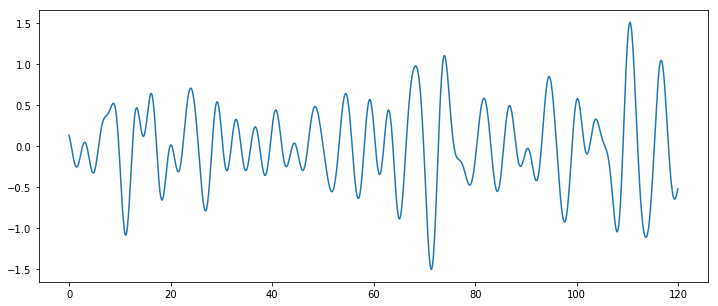

In [40]:
A = 0.78
B = 3.11/4
N = 40
np.random.seed(12)
epsilon = np.random.rand(N+1)*2*np.pi-np.pi
w = 0.05*np.arange(0, 41)

def sqrt_calculate(w_n, w_n_1):
    if w_n==0:
        w_n=1e-8
    if w_n_1==0:
        w_n_1=1e-8
    val = np.exp(-B*np.power(w_n, -4))-np.exp(-B*np.power(w_n_1,-4))
    val = np.sqrt(2*A/(4*B)*val)
    return val

def cosi(t):
    val = 0
    for i in range(1, N+1):
        w_n = w[i]
        w_n_1 = w[i-1]
        val += sqrt_calculate(w_n, w_n_1)*np.cos(w_n*t+epsilon[i])
    return val

t = np.arange(0, 120, 0.1)
val = cosi(t)
plt.figure(figsize=[12,5])
plt.plot(t, val, '-')
plt.show()

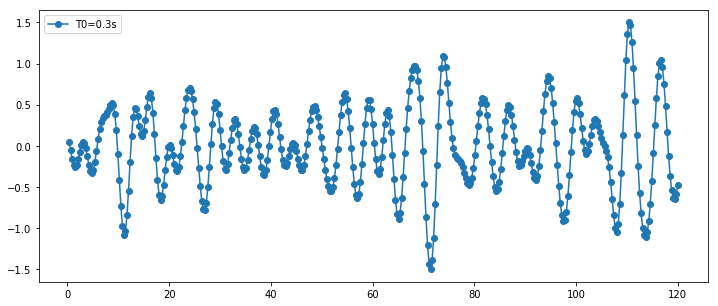

In [41]:
T0 = 0.3
nT0 = T0*np.arange(1,400+1,1)
lis = cosi(nT0)
plt.figure(figsize=[12,5])
plt.plot(nT0, lis, '-o')
plt.legend(['T0=0.3s'])
plt.show()

In [42]:
print('mean: ', np.mean(lis))

mean:  -0.00436546577416


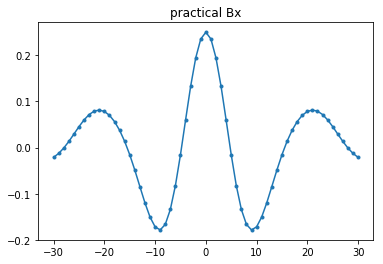

In [43]:
Bx_h = np.zeros((61, 1))
x = np.arange(-30, 30+1, 1)
for i, v in enumerate(x):
    Bx_h[i] = Bx_hat(lis, v)

plt.figure()
plt.plot(x, Bx_h, '.-')
plt.title('practical Bx')
plt.show()

In [44]:
def S_cosi_hat(w):
    T0 = 0.3
    N = 400
    val = 0
    for m in range(1,N+1):
        val += cosi(m*T0)*np.exp(np.complex(0,-w*m*T0))
    return val.imag**2+val.real**2

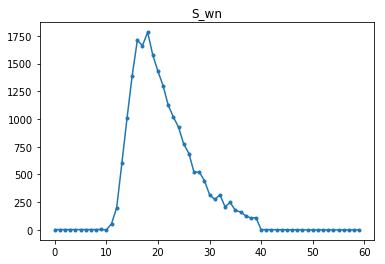

In [45]:
S_cosi_w_n_hat = np.zeros((60,1))
for i,v in enumerate(range(1, 61)):
    w_n = 0.05*v
    S_cosi_w_n_hat[i] = S_cosi_hat(w_n)
plt.plot(S_cosi_w_n_hat, '.-')
plt.title('S_wn')
plt.show()

In [46]:
def S_cosi(w):
    return A/np.power(w,5)*np.exp(-B/np.power(w,4))
S_cosi_w_n = np.zeros((60,1))
for i,v in enumerate(range(1, 61)):
    w_n = 0.05*v
    S_cosi_w_n[i] = S_cosi(w_n)

C = np.max(S_cosi_w_n_hat)/np.max(S_cosi_w_n)

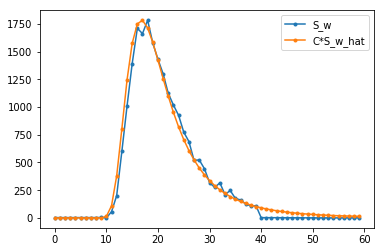

In [47]:
plt.plot()
plt.plot(S_cosi_w_n_hat, '.-')
plt.plot(S_cosi_w_n*C, '.-')
plt.legend(['S_w', 'C*S_w_hat'])
plt.show()